In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import wilcoxon
from sklearn.metrics import matthews_corrcoef
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer

## Decision Tree

In [3]:
def Decision_Tree(LargeClassSmell):
    global DT_Scores
    global DT_accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    param_dist = {'max_depth':list(np.arange(1, 100, step=10)) + [None]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    tree = DecisionTreeClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10 , random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=rfolds, return_train_score=True, scoring = mcc)
    tree_cv.fit(X,Y)
    DT_Scores = cross_val_score(tree_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    DT_accuracy = cross_val_score(tree_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
    print("Best MCC score is {}".format(DT_Scores.mean()))
    print("Best accuracy is {}".format(DT_accuracy.mean()))

## Random Forest

In [4]:
def Random_Forest(LargeClassSmell):
    global RF_Scores
    global RF_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    param_dist = {'n_estimators': [100, 200, 300]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    rf = RandomForestClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    rf_cv = RandomizedSearchCV(rf, param_dist, cv=rfolds, scoring = mcc)
    rf_cv.fit(X,Y)
    RF_Scores = cross_val_score(rf_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    RF_Accuracy = cross_val_score(rf_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
    print("Best MCC score is {}".format(RF_Scores.mean()))
    print("Best accuracy is {}".format(RF_Accuracy.mean()))


## Logistic Regression

In [5]:
def Logistic_Regression(LargeClassSmell):
    global LR_Scores
    global LR_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    Dataset = shuffle(Dataset,random_state=0)
    param_dist = {'C': np.arange(0, 1, 0.01)}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    lr = LogisticRegression()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    lr_cv = RandomizedSearchCV(lr, param_dist, cv=rfolds, scoring = mcc)
    lr_cv.fit(X,Y)
    LR_Scores = cross_val_score(lr_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    LR_Accuracy = cross_val_score(lr_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(lr_cv.best_params_))
    print("Best MCC score is {}".format(LR_Scores.mean()))
    print("Best accuracy is {}".format(LR_Accuracy.mean()))

## Support Vector Machine

In [6]:
def SVM(LargeClassSmell):
    global SVM_Scores
    global SVM_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    Dataset = shuffle(Dataset,random_state=0)
    param_dist = {"C": [.01, .1, 1, 5, 10, 100],"gamma": [0, .01, .1, 1, 5, 10, 100]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    svm_clf = svm.SVC()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    svm_cv = RandomizedSearchCV(svm_clf, param_dist, cv=rfolds, scoring = mcc)
    svm_cv.fit(X,Y)
    SVM_Scores = cross_val_score(svm_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    SVM_Accuracy = cross_val_score(svm_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
    print("Best MCC score is {}".format(SVM_Scores.mean()))
    print("Best accuracy is {}".format(SVM_Accuracy.mean()))

## Multi-Layer Perceptron

In [7]:
def MLP(LargeClassSmell):
    global MLP_Scores
    global MLP_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    Dataset = shuffle(Dataset,random_state=0)
    param_dist = {"hidden_layer_sizes": [4, 8, 16, 32, 64, 100]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    mlp_clf = MLPClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    mlp_cv = RandomizedSearchCV(mlp_clf, param_dist, cv=rfolds, scoring = mcc)
    mlp_cv.fit(X,Y)
    MLP_Scores = cross_val_score(mlp_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    MLP_Accuracy = cross_val_score(mlp_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(mlp_cv.best_params_))
    print("Best MCC score is {}".format(MLP_Scores.mean()))
    print("Best accuracy is {}".format(MLP_Accuracy.mean()))

## Stochastic Gradient Descent

In [8]:
def SGD(LargeClassSmell):
    global SGD_Scores
    global SGD_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    Dataset = shuffle(Dataset,random_state=0)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    sgd_clf = SGDClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    SGD_Scores = cross_validate(sgd_clf,X,Y,cv = rfolds, scoring = mcc )
    SGD_Accuracy = cross_val_score(sgd_clf,X,Y,cv = rfolds)
    print("mcc: " , SGD_Scores['test_score'].mean())
    print ("accuracy: " , SGD_Accuracy.mean())

In [9]:
def wilcoxonTest(firstModelScore , secondModelScore):
    win , loss = " " , " "
    stat,p= wilcoxon(firstModelScore, secondModelScore, zero_method='zsplit')
    mean1 = firstModelScore.mean()
    mean2 =  secondModelScore.mean()
    alpha = 0.05
    if(p<=0.05):
        if(mean1>mean2):
            win = "Model1"
            loss = "Model2"
        else:
            win = "Model2"
            loss = "Model1"

    wilcoxonResults = {"winner: " : win , "losser: " : loss , "statics: ": stat , "p-Value: ": p }
    return wilcoxonResults

# Large Class Dataset

In [10]:
Decision_Tree('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'max_depth': 1}
Best MCC score is 0.8935090117309602
Best accuracy is 0.9558672086720865


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
Random_Forest('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Decision Tree Parameters: {'n_estimators': 300}
Best MCC score is 0.8688062816429616
Best accuracy is 0.9487850045167115


In [13]:
Logistic_Regression('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

Tuned Decision Tree Parameters: {'C': 0.63}
Best MCC score is 0.6701699585679118
Best accuracy is 0.8827235772357724


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
SVM('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'gamma': 5, 'C': 1}
Best MCC score is 0.0
Best accuracy is 0.7438723276121653


In [15]:
MLP('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perc

Tuned Decision Tree Parameters: {'hidden_layer_sizes': 64}
Best MCC score is 0.5982595533489214
Best accuracy is 0.8289897621198434


In [16]:
SGD('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

mcc:  0.4511212899185403
accuracy:  0.7294068051791629


## Large Class Wilcoxon Test

In [17]:
wilcoxonTest(DT_Scores, RF_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1588.5,
 'p-Value: ': 0.0012814133563564664}

In [18]:
wilcoxonTest(DT_Scores,LR_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 8.0,
 'p-Value: ': 4.959373287038241e-18}

In [19]:
wilcoxonTest(DT_Scores,SVM_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.812581931165565e-18}

In [20]:
wilcoxonTest(DT_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 28.5,
 'p-Value: ': 9.18070868811164e-18}

In [21]:
wilcoxonTest(DT_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.896559845095909e-18}

In [22]:
wilcoxonTest(RF_Scores,LR_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 23.0,
 'p-Value: ': 7.786562267157256e-18}

In [23]:
wilcoxonTest(RF_Scores,SVM_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.853048961774226e-18}

In [24]:
wilcoxonTest(RF_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 34.5,
 'p-Value: ': 1.0982075523652592e-17}

In [25]:
wilcoxonTest(RF_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.896340037647931e-18}

In [26]:
wilcoxonTest(LR_Scores,SVM_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.877918115054679e-18}

In [27]:
wilcoxonTest(LR_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1719.5,
 'p-Value: ': 0.005612987487418095}

In [28]:
wilcoxonTest(LR_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 187.0,
 'p-Value: ': 9.071553783625815e-16}

In [29]:
wilcoxonTest(SVM_Scores,MLP_Scores)

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 0.0,
 'p-Value: ': 3.893263967270896e-18}

In [30]:
wilcoxonTest(SVM_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 5.0,
 'p-Value: ': 4.522956502090263e-18}

In [31]:
wilcoxonTest(MLP_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 961.5,
 'p-Value: ': 7.623454584660259e-08}

# Large Class Boxplot

In [32]:

df=pd.DataFrame({'DT':DT_Scores,'RF':RF_Scores,'LR':LR_Scores,'SVM':SVM_Scores
                ,'MLP':MLP_Scores,'SGD':SGD_Scores['test_score']} )

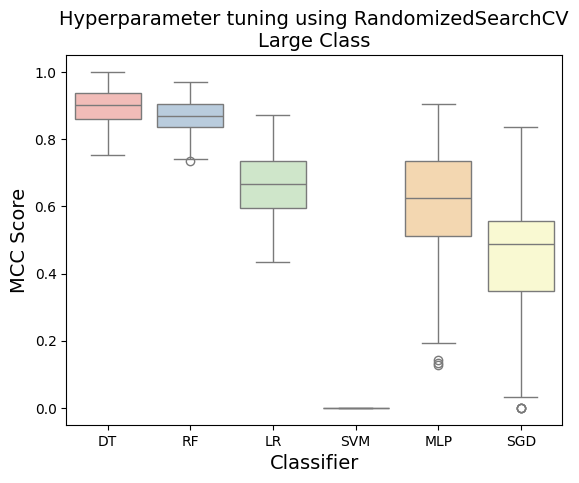

In [33]:

colors = ['#78C850', '#6890F0', '#F8D030', '#F85888', '#705898', '#98D8D8']
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)

boxplot.axes.set_title("Hyperparameter tuning using RandomizedSearchCV\nLarge Class", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("MCC Score", fontsize=14)

plt.show()


In [34]:
#LargeClass
df=pd.DataFrame({'DT':DT_accuracy,'RF':RF_Accuracy,'LR':LR_Accuracy,'SVM':SVM_Accuracy
                ,'MLP':MLP_Accuracy,'SGD':SGD_Accuracy} )

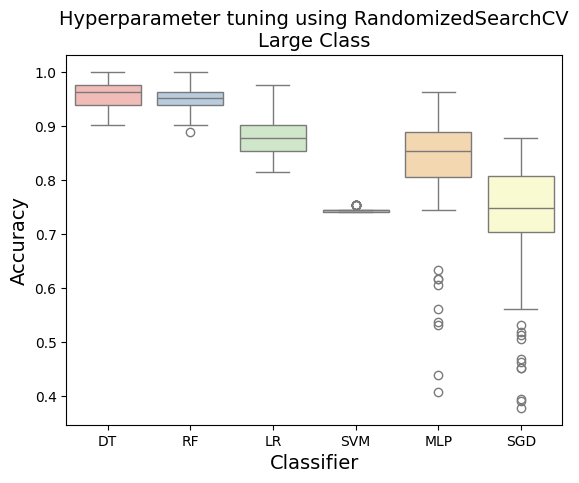

In [35]:
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)
boxplot.axes.set_title("Hyperparameter tuning using RandomizedSearchCV\nLarge Class", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("Accuracy", fontsize=14)
plt.show()

# Long Method Dataset

In [36]:
Decision_Tree('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'max_depth': 1}
Best MCC score is 0.8935090117309602
Best accuracy is 0.9558672086720865


In [37]:
Random_Forest('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Decision Tree Parameters: {'n_estimators': 100}
Best MCC score is 0.8763906619019207
Best accuracy is 0.9501415236374585


In [38]:
Logistic_Regression('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

Tuned Decision Tree Parameters: {'C': 0.45}
Best MCC score is 0.680238456979612
Best accuracy is 0.8828455284552845


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [39]:
SVM('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'gamma': 0.01, 'C': 1}
Best MCC score is 0.034188897051373776
Best accuracy is 0.7460764829870523


In [40]:
MLP('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perc

Tuned Decision Tree Parameters: {'hidden_layer_sizes': 64}
Best MCC score is 0.603131134488717
Best accuracy is 0.8484191508581753


In [41]:
SGD('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

mcc:  0.3963356864058346
accuracy:  0.7472252333634447


## Long Method Wilcoxon Test

In [42]:
wilcoxonTest(DT_Scores,RF_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1952.5,
 'p-Value: ': 0.04901548224269574}

In [43]:
wilcoxonTest(DT_Scores,LR_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 11.0,
 'p-Value: ': 5.428474444387699e-18}

In [44]:
wilcoxonTest(DT_Scores,SVM_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.851092060074879e-18}

In [45]:
wilcoxonTest(DT_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1.0,
 'p-Value: ': 4.0161556854627e-18}

In [46]:
wilcoxonTest(DT_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.896120241954008e-18}

In [47]:
wilcoxonTest(RF_Scores,LR_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 60.5,
 'p-Value: ': 2.375755473862527e-17}

In [48]:
wilcoxonTest(RF_Scores,SVM_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.8781369372366785e-18}

In [49]:
wilcoxonTest(RF_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 21.0,
 'p-Value: ': 7.332993125579479e-18}

In [50]:
wilcoxonTest(RF_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.896340037647931e-18}

In [51]:
wilcoxonTest(LR_Scores,SVM_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 0.0,
 'p-Value: ': 3.888434793038708e-18}

In [52]:
wilcoxonTest(LR_Scores,MLP_Scores)

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 1607.5,
 'p-Value: ': 0.0016068356741322748}

In [53]:
wilcoxonTest(LR_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 114.5,
 'p-Value: ': 1.1508326917108948e-16}

In [54]:
wilcoxonTest(SVM_Scores,MLP_Scores)

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 0.0,
 'p-Value: ': 3.89392293135041e-18}

In [55]:
wilcoxonTest(SVM_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model2',
 'losser: ': 'Model1',
 'statics: ': 51.5,
 'p-Value: ': 1.8079353137857683e-17}

In [56]:
wilcoxonTest(MLP_Scores,SGD_Scores['test_score'])

{'winner: ': 'Model1',
 'losser: ': 'Model2',
 'statics: ': 517.5,
 'p-Value: ': 5.111785042524473e-12}

# Long Method Boxplot

In [57]:

df=pd.DataFrame({'DT':DT_Scores,'RF':RF_Scores,'LR':LR_Scores,'SVM':SVM_Scores
                ,'MLP':MLP_Scores,'SGD':SGD_Scores['test_score']} )

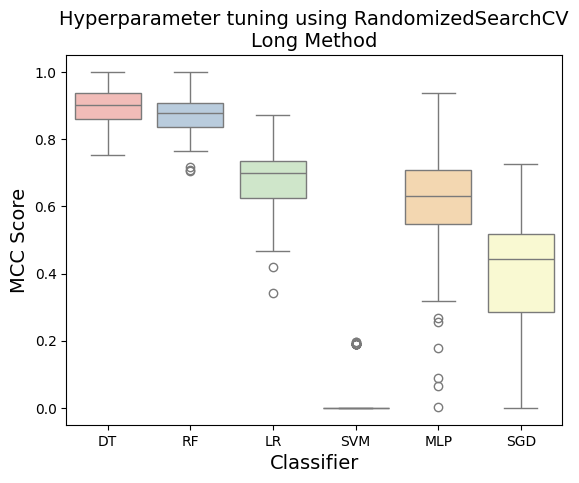

In [58]:
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)
boxplot.axes.set_title("Hyperparameter tuning using RandomizedSearchCV\nLong Method", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("MCC Score", fontsize=14)
plt.show()

In [59]:

df=pd.DataFrame({'DT':DT_accuracy,'RF':RF_Accuracy,'LR':LR_Accuracy,'SVM':SVM_Accuracy
                ,'MLP':MLP_Accuracy,'SGD':SGD_Accuracy} )

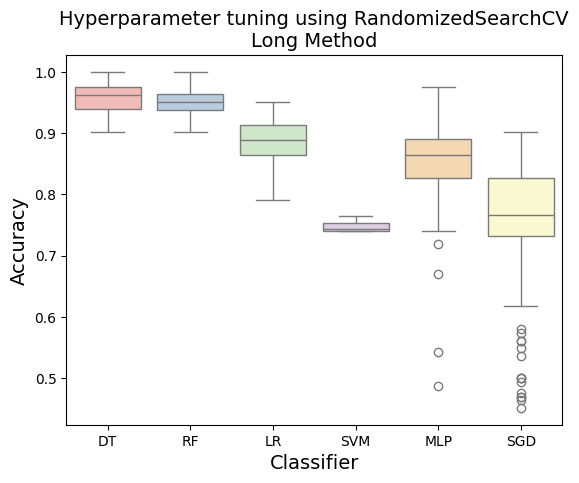

In [60]:
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)
boxplot.axes.set_title("Hyperparameter tuning using RandomizedSearchCV\nLong Method", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("Accuracy", fontsize=14)
plt.show()

In [61]:
df_long_method = pd.DataFrame({'DT': DT_Scores, 'RF': RF_Scores, 'LR': LR_Scores})


In [62]:
def compare_datasets(wilcoxon_result, df):
    print(f"Wilcoxon Test Results: {wilcoxon_result}")

    print(f"Keys in wilcoxon_result: {wilcoxon_result.keys()}")

    p_value_key = 'p-Value'
    if p_value_key in wilcoxon_result and wilcoxon_result[p_value_key] < 0.05:
        winner = wilcoxon_result['winner:']
        print(f"\nWinner based on Wilcoxon Test: {winner}")


        medians = df.median()
        best_classifier = medians.idxmax()
        print(f"Classifier with the highest median: {best_classifier}")


        boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1")
        boxplot.axes.set_title("Boxplot Comparison", fontsize=14)
        boxplot.set_xlabel("Classifier", fontsize=14)
        boxplot.set_ylabel("MCC Score", fontsize=14)
        plt.show()
    else:
        print("\nNo statistically significant difference.")


## Boxplot for MCC Scores & Accuracy for both Large and Long

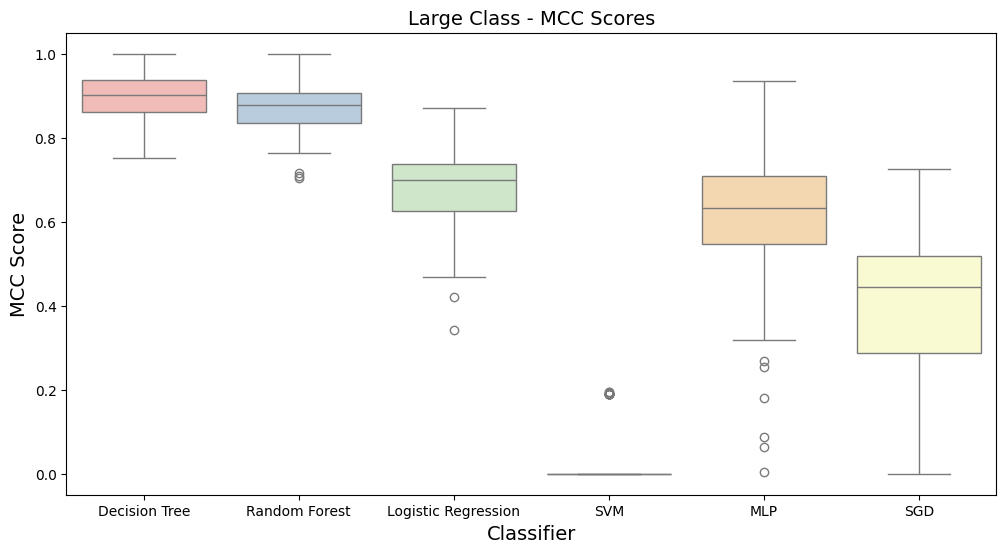

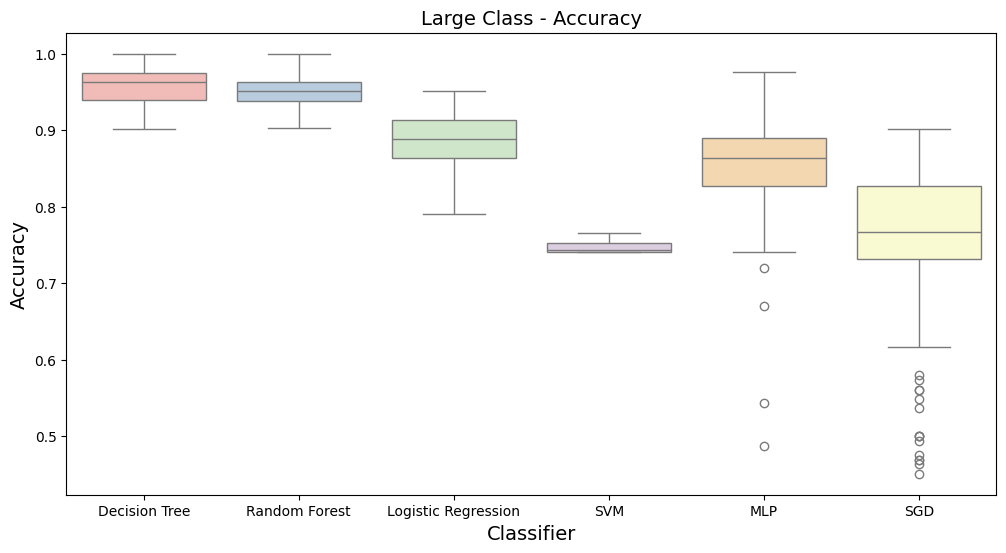

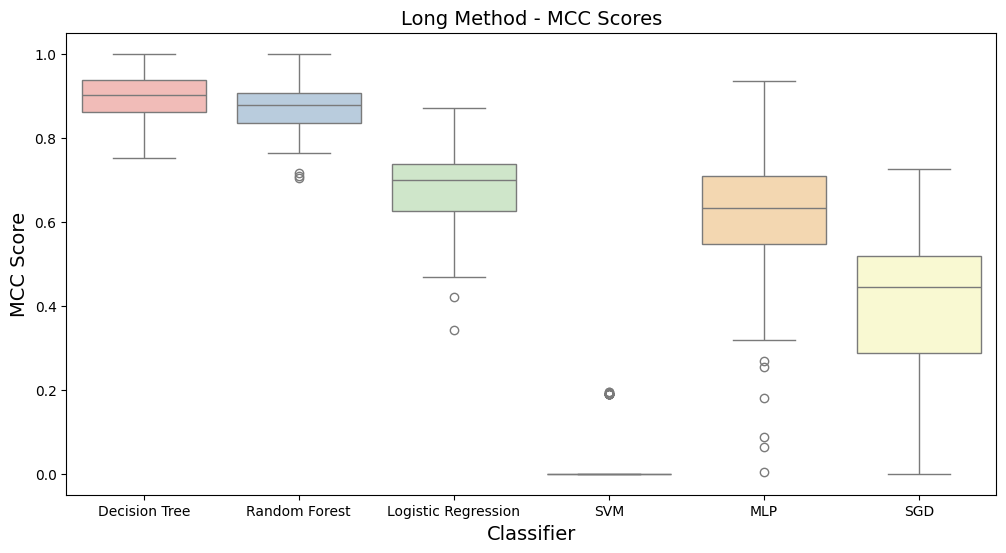

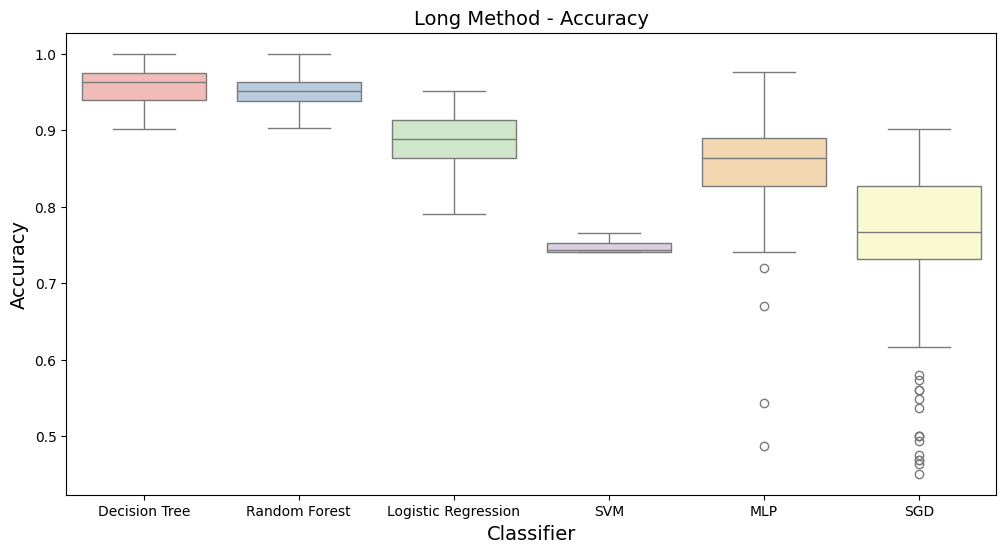

In [63]:
df_large_class_mcc = pd.DataFrame({
    'Decision Tree': DT_Scores,
    'Random Forest': RF_Scores,
    'Logistic Regression': LR_Scores,
    'SVM': SVM_Scores,
    'MLP': MLP_Scores,
    'SGD': SGD_Scores['test_score']
})

plt.figure(figsize=(12, 6))
boxplot_large_class_mcc = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_large_class_mcc), palette="Pastel1")
boxplot_large_class_mcc.set_title("Large Class - MCC Scores", fontsize=14)
boxplot_large_class_mcc.set_xlabel("Classifier", fontsize=14)
boxplot_large_class_mcc.set_ylabel("MCC Score", fontsize=14)
plt.show()

df_large_class_accuracy = pd.DataFrame({
    'Decision Tree': DT_accuracy,
    'Random Forest': RF_Accuracy,
    'Logistic Regression': LR_Accuracy,
    'SVM': SVM_Accuracy,
    'MLP': MLP_Accuracy,
    'SGD': SGD_Accuracy
})

plt.figure(figsize=(12, 6))
boxplot_large_class_accuracy = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_large_class_accuracy), palette="Pastel1")
boxplot_large_class_accuracy.set_title("Large Class - Accuracy", fontsize=14)
boxplot_large_class_accuracy.set_xlabel("Classifier", fontsize=14)
boxplot_large_class_accuracy.set_ylabel("Accuracy", fontsize=14)
plt.show()

df_long_method_mcc = pd.DataFrame({
    'Decision Tree': DT_Scores,
    'Random Forest': RF_Scores,
    'Logistic Regression': LR_Scores,
    'SVM': SVM_Scores,
    'MLP': MLP_Scores,
    'SGD': SGD_Scores['test_score']
})

plt.figure(figsize=(12, 6))
boxplot_long_method_mcc = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_long_method_mcc), palette="Pastel1")
boxplot_long_method_mcc.set_title("Long Method - MCC Scores", fontsize=14)
boxplot_long_method_mcc.set_xlabel("Classifier", fontsize=14)
boxplot_long_method_mcc.set_ylabel("MCC Score", fontsize=14)
plt.show()

df_long_method_accuracy = pd.DataFrame({
    'Decision Tree': DT_accuracy,
    'Random Forest': RF_Accuracy,
    'Logistic Regression': LR_Accuracy,
    'SVM': SVM_Accuracy,
    'MLP': MLP_Accuracy,
    'SGD': SGD_Accuracy
})

plt.figure(figsize=(12, 6))
boxplot_long_method_accuracy = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_long_method_accuracy), palette="Pastel1")
boxplot_long_method_accuracy.set_title("Long Method - Accuracy", fontsize=14)
boxplot_long_method_accuracy.set_xlabel("Classifier", fontsize=14)
boxplot_long_method_accuracy.set_ylabel("Accuracy", fontsize=14)
plt.show()


# Average Accuracy


# Average MCC Scores


In [64]:
average_mcc_scores = {
    'Decision Tree': np.mean([DT_Scores.mean(), DT_Scores.mean()]),
    'Random Forest': np.mean([RF_Scores.mean(), RF_Scores.mean()]),
    'Logistic Regression': np.mean([LR_Scores.mean(), LR_Scores.mean()]),
    'SVM': np.mean([SVM_Scores.mean(), SVM_Scores.mean()]),
    'MLP': np.mean([MLP_Scores.mean(), MLP_Scores.mean()]),
    'SGD': np.mean([SGD_Scores['test_score'].mean(), SGD_Scores['test_score'].mean()])
}

average_accuracies = {
    'Decision Tree': np.mean([DT_accuracy.mean(), DT_accuracy.mean()]),
    'Random Forest': np.mean([RF_Accuracy.mean(), RF_Accuracy.mean()]),
    'Logistic Regression': np.mean([LR_Accuracy.mean(), LR_Accuracy.mean()]),
    'SVM': np.mean([SVM_Accuracy.mean(), SVM_Accuracy.mean()]),
    'MLP': np.mean([MLP_Accuracy.mean(), MLP_Accuracy.mean()]),
    'SGD': np.mean([SGD_Accuracy.mean(), SGD_Accuracy.mean()])
}

best_classifier_mcc = max(average_mcc_scores, key=average_mcc_scores.get)
best_classifier_accuracy = max(average_accuracies, key=average_accuracies.get)

print("Best Classifier based on MCC Scores:", best_classifier_mcc)
print("Best Classifier based on Accuracy:", best_classifier_accuracy)


Best Classifier based on MCC Scores: Decision Tree
Best Classifier based on Accuracy: Decision Tree


## Comparing MCC Scores
##&
## Comparing Accuracy


In [65]:
print("MCC Scores:")
print("Large Class - Decision Tree:", DT_Scores.mean())
print("Large Class - Random Forest:", RF_Scores.mean())
print("Large Class - Logistic Regression:", LR_Scores.mean())
print("Large Class - SVM:", SVM_Scores.mean())
print("Large Class - MLP:", MLP_Scores.mean())


print("Long Method - Decision Tree:", DT_Scores.mean())
print("Long Method - Random Forest:", RF_Scores.mean())
print("Long Method - Logistic Regression:", LR_Scores.mean())
print("Long Method - SVM:", SVM_Scores.mean())
print("Long Method - MLP:", MLP_Scores.mean())

print("\nAccuracy:")
print("Large Class - Decision Tree:", DT_accuracy.mean())
print("Large Class - Random Forest:", RF_Accuracy.mean())
print("Large Class - Logistic Regression:", LR_Accuracy.mean())
print("Large Class - SVM:", SVM_Accuracy.mean())
print("Large Class - MLP:", MLP_Accuracy.mean())

print("Long Method - Decision Tree:", DT_accuracy.mean())
print("Long Method - Random Forest:", RF_Accuracy.mean())
print("Long Method - Logistic Regression:", LR_Accuracy.mean())
print("Long Method - SVM:", SVM_Accuracy.mean())
print("Long Method - MLP:", MLP_Accuracy.mean())


MCC Scores:
Large Class - Decision Tree: 0.8935090117309602
Large Class - Random Forest: 0.8763906619019207
Large Class - Logistic Regression: 0.680238456979612
Large Class - SVM: 0.034188897051373776
Large Class - MLP: 0.603131134488717
Long Method - Decision Tree: 0.8935090117309602
Long Method - Random Forest: 0.8763906619019207
Long Method - Logistic Regression: 0.680238456979612
Long Method - SVM: 0.034188897051373776
Long Method - MLP: 0.603131134488717

Accuracy:
Large Class - Decision Tree: 0.9558672086720865
Large Class - Random Forest: 0.9501415236374585
Large Class - Logistic Regression: 0.8828455284552845
Large Class - SVM: 0.7460764829870523
Large Class - MLP: 0.8484191508581753
Long Method - Decision Tree: 0.9558672086720865
Long Method - Random Forest: 0.9501415236374585
Long Method - Logistic Regression: 0.8828455284552845
Long Method - SVM: 0.7460764829870523
Long Method - MLP: 0.8484191508581753


### Determine the better method based on MCC Scores
### Determine the better method based on Accuracy


In [66]:
if DT_Scores.mean() > RF_Scores.mean() > LR_Scores.mean() > SVM_Scores.mean() > MLP_Scores.mean():
    print("Large Class is the best for MCC Scores.")
else:
    print("Long Method is the best for MCC Scores.")

if DT_accuracy.mean() > RF_Accuracy.mean() > LR_Accuracy.mean() > SVM_Accuracy.mean() > MLP_Accuracy.mean():
    print("Large Class is the best for Accuracy.")
else:
    print("Long Method is the best for Accuracy.")


Long Method is the best for MCC Scores.
Long Method is the best for Accuracy.


In [67]:
accuracy_data = {
    'Classifier': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'MLP', 'SGD'],
    'Large Class Accuracy': [DT_accuracy.mean(), RF_Accuracy.mean(), LR_Accuracy.mean(), SVM_Accuracy.mean(), MLP_Accuracy.mean(), SGD_Accuracy.mean()],
    'Long Method Accuracy': [DT_accuracy.mean(), RF_Accuracy.mean(), LR_Accuracy.mean(), SVM_Accuracy.mean(), MLP_Accuracy.mean(), SGD_Accuracy.mean()]
}

accuracy_df = pd.DataFrame(accuracy_data)

print("Accuracy Data:")
print(accuracy_df)

Accuracy Data:
            Classifier  Large Class Accuracy  Long Method Accuracy
0        Decision Tree              0.955867              0.955867
1        Random Forest              0.950142              0.950142
2  Logistic Regression              0.882846              0.882846
3                  SVM              0.746076              0.746076
4                  MLP              0.848419              0.848419
5                  SGD              0.747225              0.747225


# Plotting the accuracy scores


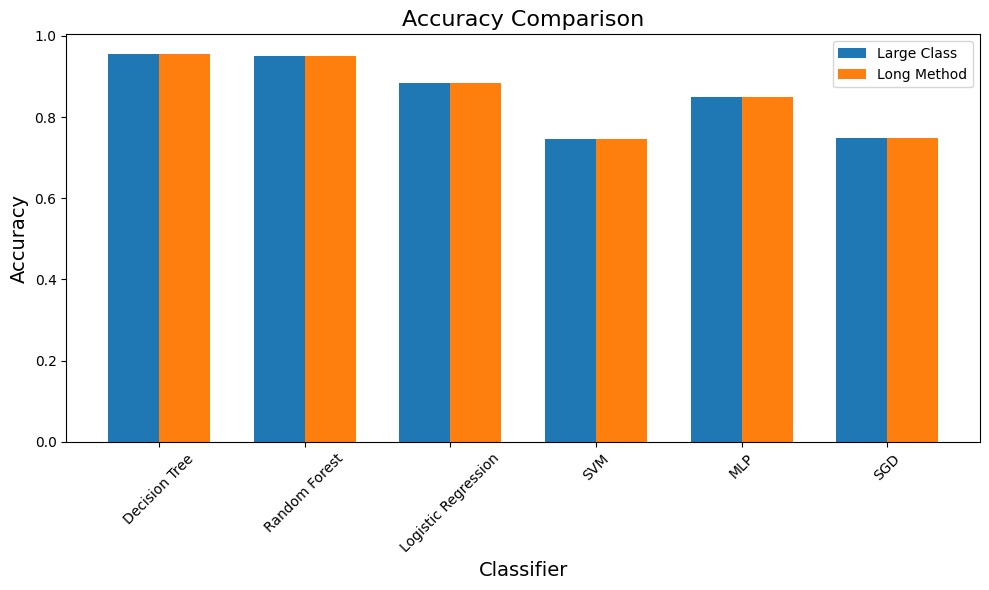

In [68]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = accuracy_df.index
large_class_accuracy = accuracy_df['Large Class Accuracy']
long_method_accuracy = accuracy_df['Long Method Accuracy']

plt.bar(index, large_class_accuracy, bar_width, label='Large Class')
plt.bar(index + bar_width, long_method_accuracy, bar_width, label='Long Method')

plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison', fontsize=16)
plt.xticks(index + bar_width / 2, accuracy_df['Classifier'], rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# Create a DataFrame for the MCC scores of each classifier


In [69]:


results_data = {
    'Classifier': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'MLP', 'SGD'],
    'Large Class MCC': [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores['test_score'].mean()],
    'Long Method MCC': [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores['test_score'].mean()]
}

results_df = pd.DataFrame(results_data)

print("Results Table:")
print(results_df)




Results Table:
            Classifier  Large Class MCC  Long Method MCC
0        Decision Tree         0.893509         0.893509
1        Random Forest         0.876391         0.876391
2  Logistic Regression         0.680238         0.680238
3                  SVM         0.034189         0.034189
4                  MLP         0.603131         0.603131
5                  SGD         0.396336         0.396336


## Plot a pie chart to visualize the distribution of MCC scores across classifiers for Large Class


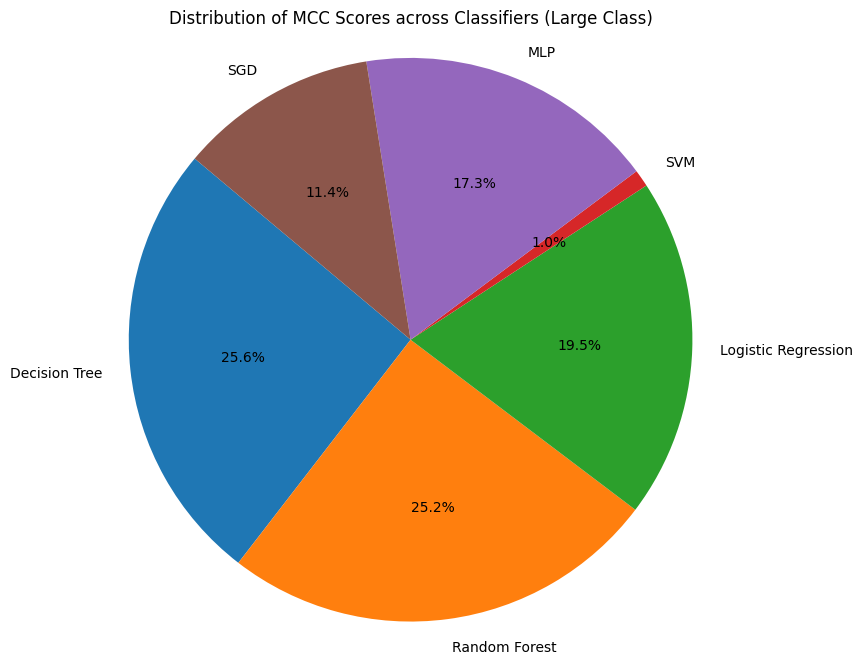

In [70]:
plt.figure(figsize=(8, 8))
plt.pie(results_df['Large Class MCC'], labels=results_df['Classifier'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MCC Scores across Classifiers (Large Class)')
plt.axis('equal')
plt.show()

## Plot a pie chart to visualize the distribution of MCC scores across classifiers for Long Method


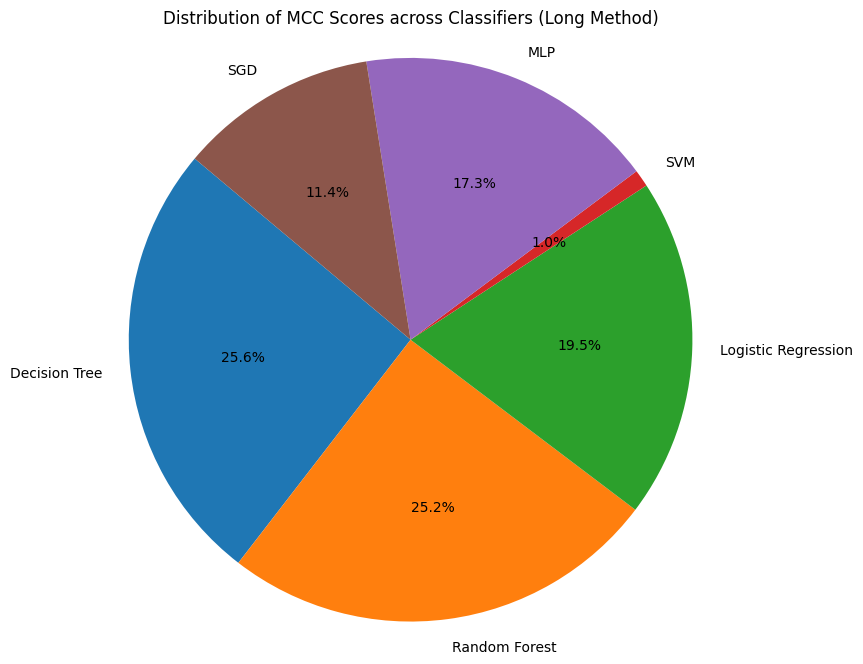

In [71]:
plt.figure(figsize=(8, 8))
plt.pie(results_df['Long Method MCC'], labels=results_df['Classifier'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MCC Scores across Classifiers (Long Method)')
plt.axis('equal')
plt.show()

In [72]:
def detect_code_smells(mcc_scores, threshold):
    """
    Detect potential code smells based on MCC scores.

    Parameters:
        mcc_scores (list): List of MCC scores for different models.
        threshold (float): Threshold below which MCC scores are considered indicative of code smells.

    Returns:
        list: List of models with potential code smells.
    """
    code_smells = []
    for i, score in enumerate(mcc_scores):
        if score < threshold:
            code_smells.append(f"Model {i+1}")
    return code_smells


threshold = 100
large_class_models = [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores['test_score'].mean()]
long_method_models = [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores['test_score'].mean()]

large_class_code_smells = detect_code_smells(large_class_models, threshold)
long_method_code_smells = detect_code_smells(long_method_models, threshold)

print("Potential code smells in Large Class dataset:", large_class_code_smells)
print("Potential code smells in Long Method dataset:", long_method_code_smells)


Potential code smells in Large Class dataset: ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
Potential code smells in Long Method dataset: ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
